### Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. 

Наша задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
- Спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- Сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- Проанализировать основные признаки, наиболее сильно влияющие на отток;
- Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.

### Описание данных

Предоставлены данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.   
Набор данных включает следующие поля:

- 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные пользователя за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

### 1. Загрузка данных 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
gym = pd.read_csv(r'C:\Users\home\YANDEX.PRAKTIKUM\12.Predictions\gym_churn.csv')

In [3]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Данные состоят из 4000 строк и 15 столбцов. Пропусков нет. Все столбцы приведены к числовому формату. В данных есть как количественные так и бинарные признаки. Целевая переменная столбец `Churn` является бинарной.

### 2. EDA

In [5]:
#приведем названия столбцов к нижнему регистру
gym.columns = gym.columns.str.lower()

Изучим средние значения и стандартные отклонения признаков.

In [6]:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


- Мужчин и женщин примерно поровну
- Люди предпочитают ходить в зал рядом с домом
- Половина посетителей приходят из партнерских компаний
- Треть посетителей приходят, чтобы заниматься с друзьями
- 10% людей предпочитают не оставляют свой номер телефона
- В среднем люди покупают абонемент на полгода
- 41% людей посещает груповые занятия
- В большинстве возраст посетителей от 26 до 32 лет
- В большинстве люди тратят от 50 до 242 на другие услуги зала
- В среднем у посетителей до конца абонемента 5 месяцев
- Среднее время посещения зала 3.7 месяцев
- Среднее число посещений с момента начала действи я абонемента 1.8
- Среднее число посещений с за последний месяц 1.7
- Показатели оттока 26%

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [7]:
gym.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Среди оставшихся больше тех:

- кто ближе живет
- у кого больше друзей в клубе
- у кого партнерская программа с клубом
- кто взял абонемент на больший срок
- кто активнее ходит на групповые занятия
- кто старше
- кто больше тратит денег на другие услуги
- у кого абонемент не скоро закончится
- кто дольше ходит в этот клуб
- кто чаще посещает зал в неделю

In [8]:
#Выделим бинарные и количественные признаки
binary_feature = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
quantitative_feature = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

Построим нормализованные столбчатые диаграммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

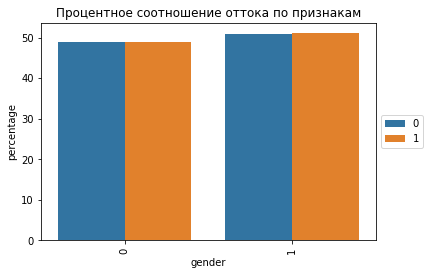

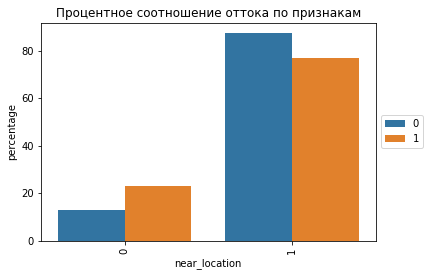

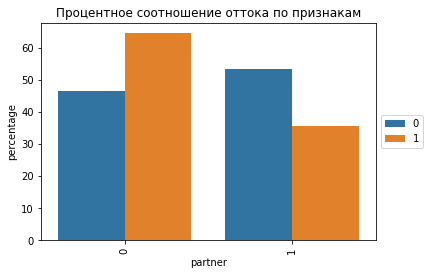

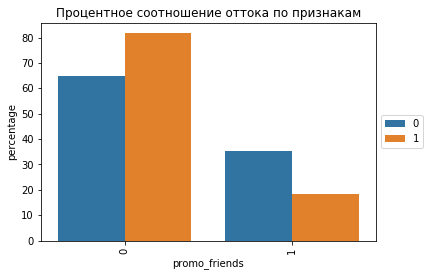

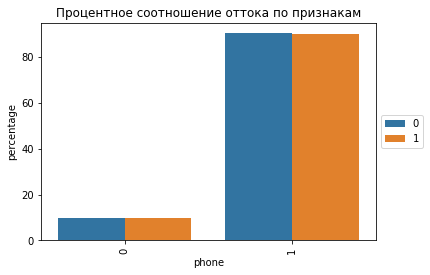

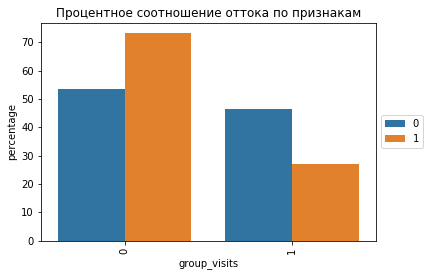

In [9]:
for column in binary_feature:
    b_f = (gym.groupby(['churn'])[column]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(column))
    p = sns.barplot(x=column, y="percentage", hue="churn", data=b_f)
    _ = plt.setp(p.get_xticklabels(), rotation=90)
    _ = plt.title('Процентное соотношение оттока по признакам')
    _ = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

По столбчатым диаграммам бинарных признаков можно заметить:
 - клиенты с нулевым значением признаков: `near_location, partner, promo_friends, group_visits` на 10-15% чаще попадают в отток. 
 - `near_location` меньше всего влияет на отток по сравнению с другими бинарными признаками -  ~10%
 - признаки `gender, phone` никак не влияют на отток

Посмтроим диаграммы размаха для количественных признаков.

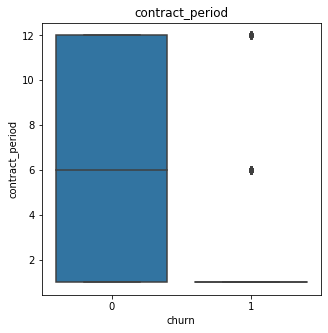

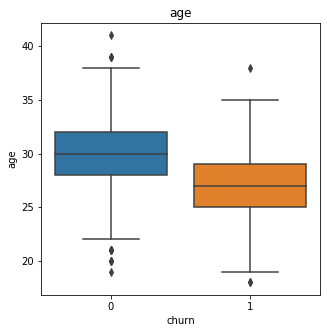

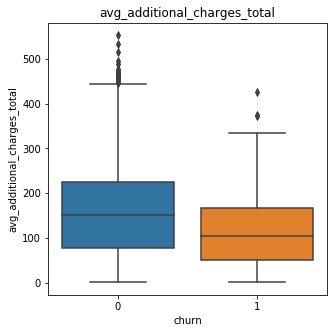

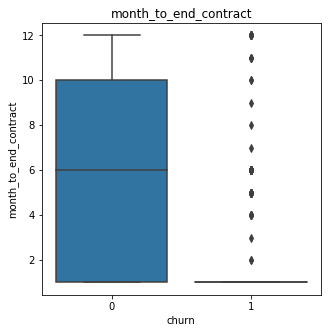

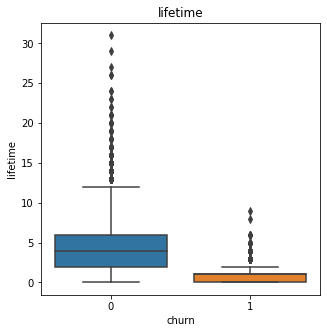

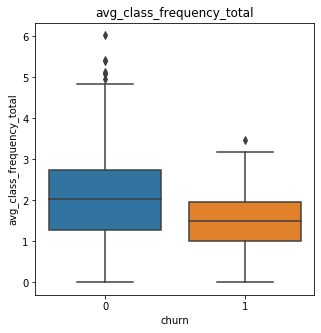

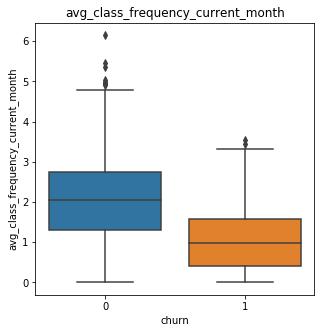

In [10]:
for column in quantitative_feature:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'churn', y = gym[column], data = gym)
    plt.title(column)
    plt.show()

По диаграммам размаха количественных признаков для клиентов попавших в отток:
- длительность текущего действующего абонемента 1 месяц
- срок до окончания текущего действующего абонемента 1 месяц
- фитнес центр за последний месяц посещают ~1 раз в неделю
- меньше тратят на доп.услуги
- время с момента первого обращения 1 месяц

Построим матрицу корреляций.

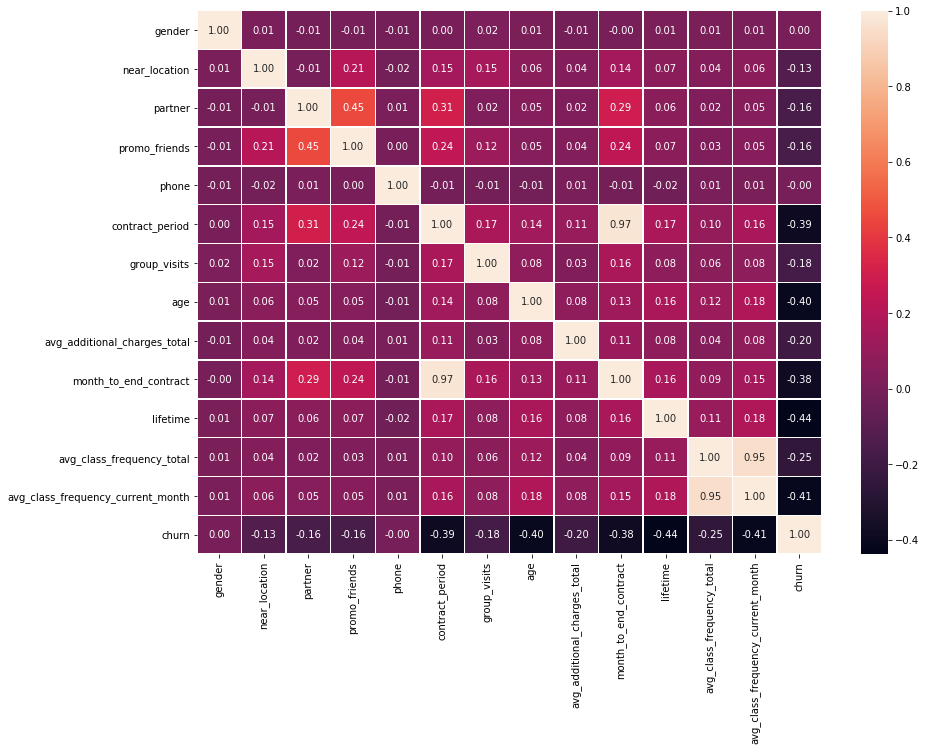

In [11]:
cm = gym.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5)
plt.show()

Мультиколлинеарные признаки:
- `contract_period` и `month_to_end_contract`
- `avg_class_frequency_current_month` и `avg_class_frequency_total`

Так же есть признаки с нулевой корреляцией к целевой переменной:
- `gender` и `phone`

### 3. Модель прогнозирования оттока пользователей

Выделим признаки и целевую переменную.   
Удалим признаки с нулевой корреляцией к целевой переменной и по одному мультиколлинеарному признаку.

In [12]:
X = gym.drop(['churn', 'gender', 'phone', 'month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)
y = gym['churn']

Разделим выборки обучающие и валидационные.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 3.1 Логистическая регрессия

Построим модель логистической регрессии и оценим метрики.

In [23]:
l_model = LogisticRegression(random_state=12345, solver='liblinear')
l_model.fit(X_train, y_train)
l_predictions = l_model.predict(X_test)
l_probabilities =  l_model.predict_proba(X_test)[:,1]

In [24]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, l_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, l_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, l_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, l_predictions)))

Accuracy: 0.88
Precision: 0.75
Recall: 0.78
F1: 0.77


#### 3.2 Случайный лес

Построим модель RandomForestClassifier с разным числом деревьев и оценим метрики.

In [16]:
print('|Estimators| Accuracy | Precision|   Recal  | f1_score |')

for estim in range(10, 200, 10):
    rf_model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    print("|{: ^10.3f}|{: ^10.3f}|{: ^10.3f}|{: ^10.3f}|{: ^10.3f}|".format(estim,
                                                                                    accuracy_score(y_test, rf_predictions),
                                                                                    precision_score(y_test, rf_predictions),
                                                                                    recall_score(y_test, rf_predictions),
                                                                                    f1_score(y_test, rf_predictions)))

|Estimators| Accuracy | Precision|   Recal  | f1_score |
|  10.000  |  0.880   |  0.768   |  0.737   |  0.753   |
|  20.000  |  0.885   |  0.776   |  0.753   |  0.764   |
|  30.000  |  0.886   |  0.777   |  0.758   |  0.767   |
|  40.000  |  0.886   |  0.777   |  0.758   |  0.767   |
|  50.000  |  0.894   |  0.796   |  0.768   |  0.781   |
|  60.000  |  0.897   |  0.805   |  0.773   |  0.789   |
|  70.000  |  0.892   |  0.789   |  0.773   |  0.781   |
|  80.000  |  0.894   |  0.784   |  0.788   |  0.786   |
|  90.000  |  0.889   |  0.777   |  0.773   |  0.775   |
| 100.000  |  0.890   |  0.781   |  0.773   |  0.777   |
| 110.000  |  0.887   |  0.776   |  0.768   |  0.772   |
| 120.000  |  0.892   |  0.789   |  0.773   |  0.781   |
| 130.000  |  0.894   |  0.793   |  0.773   |  0.783   |
| 140.000  |  0.895   |  0.794   |  0.778   |  0.786   |
| 150.000  |  0.896   |  0.798   |  0.778   |  0.788   |
| 160.000  |  0.897   |  0.805   |  0.773   |  0.789   |
| 170.000  |  0.895   |  0.797 

Лучший результат, когда число деревьев 60:

| Estimators | Accuracy | Precision | Recal | f1_score |
|:----------:|:--------:|:---------:|:-----:|:--------:|
| 60.000     | 0.897    | 0.805     | 0.773 | 0.789    |

Случайный лес показывает лучше результаты.

### 4. Кластеризация пользователей

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

In [17]:
sc = StandardScaler()
df_sс = gym.drop(['churn'], axis=1)
df_sс = sc.fit_transform(df_sс)
linked = linkage(df_sс, method = 'ward')

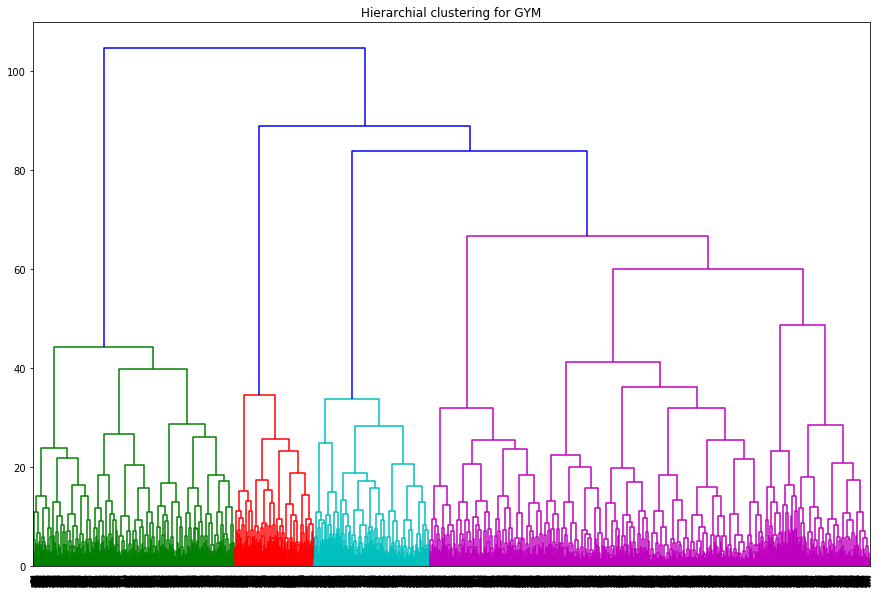

In [18]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Предположим, что кластеров 5

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [19]:
km = KMeans(n_clusters = 5, random_state=1234) # задаём число кластеров, равное 5
labels = km.fit_predict(df_sс) # применяем алгоритм к данным и формируем вектор кластеров
gym['cluster'] = labels

Посмотрим на средние значения признаков для кластеров.

In [20]:
gym.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.503490,0.495050,0.557396,0.522078,0.486529
near_location,0.959123,0.000000,0.976331,0.862338,1.000000
partner,0.782652,0.463366,0.359763,0.470130,0.351030
promo_friends,0.573280,0.079208,0.235503,0.306494,0.239303
phone,1.000000,1.000000,0.998817,0.000000,1.000000
contract_period,10.923230,2.352475,2.691124,4.787013,1.952456
group_visits,0.546361,0.215842,0.468639,0.425974,0.342314
age,29.991027,28.477228,30.112426,29.301299,28.168780
avg_additional_charges_total,160.881742,135.457501,161.820303,143.957664,131.412543
month_to_end_contract,9.983051,2.198020,2.481657,4.475325,1.860539


 - третий кластер имеет наименьший отток 1.9% 
 - кластеры 1 и 2 с наибольшим оттоком 43% и 36% выделяет низкое значение признаков: `group_visits, avg_additional_charges_total, month_to_end_contract, lifetime, avg_class_frequency_current_month, avg_class_frequency_total`.

Построим нормализованные распределения  бинарных признаков для кластеров.

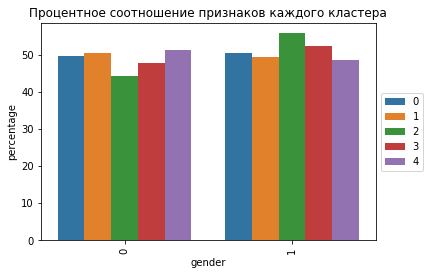

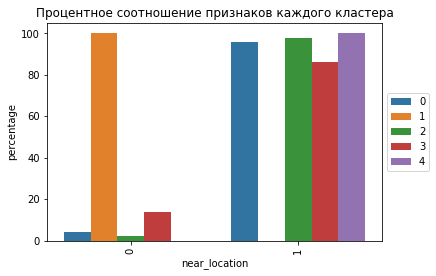

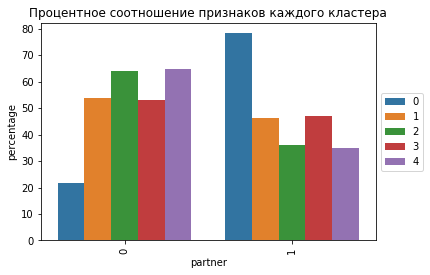

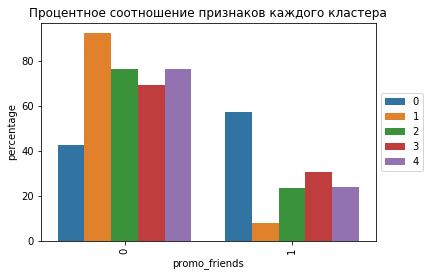

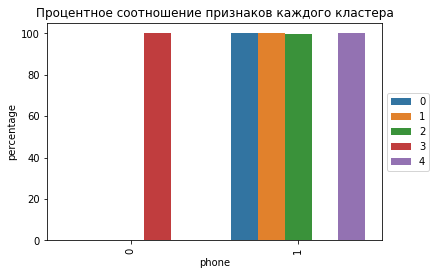

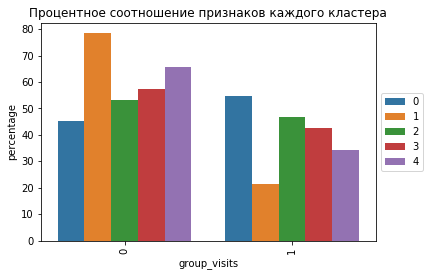

In [21]:
for column in binary_feature:
    b_f = (gym.groupby(['cluster'])[column]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(column))
    p = sns.barplot(x=column, y="percentage", hue="cluster", data=b_f)
    _ = plt.setp(p.get_xticklabels(), rotation=90)
    _ = plt.title('Процентное соотношение признаков каждого кластера')
    _ = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

У третьего кластера с наименьшим оттоком все бинарные признаки распределились в сторону положительных значений. Только признак `promo_friends` распределся примерно поровну.

Построим диаграммы размаха количественных признаков для кластеров.

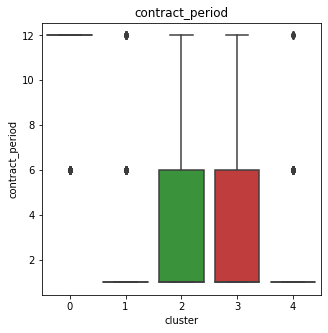

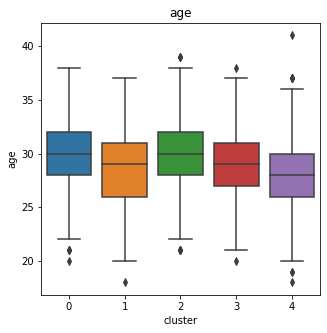

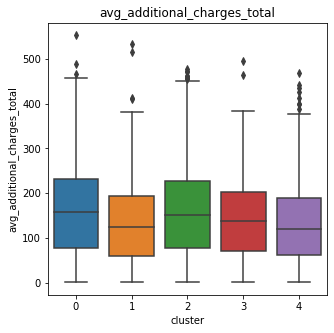

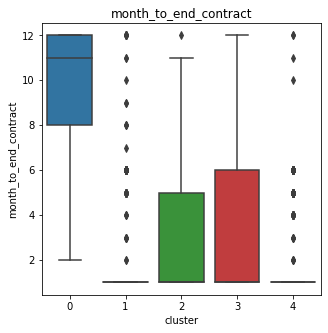

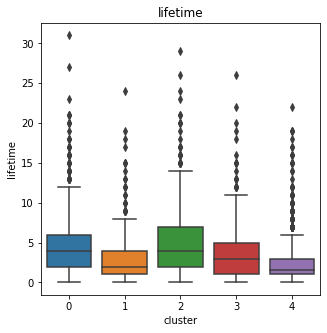

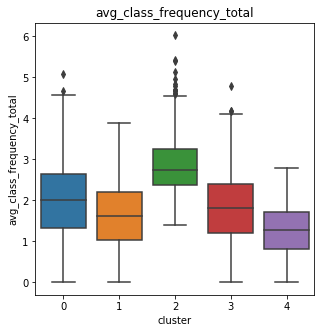

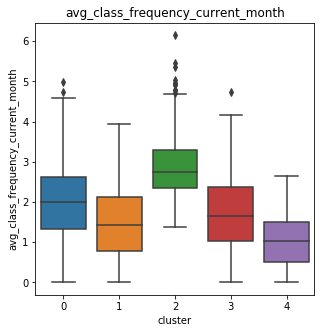

In [22]:
for column in quantitative_feature:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = gym[column], data = gym)
    plt.title(column)
    plt.show()

Все числовые характеристики у третьего кластера выше по сравнению с другими, но особенно стоит выделить `contract_period`, по сравнению с другими значение этого признака намного выше у третьго кластера. Так же признаки с наибольшим оттоком имеют минимальное значение `contract_period` .

### 5. Выводы и базовые рекомендации по работе с клиентами

Все признаки в той или иной мере влияют на отток, но лучший кластер с минимальным количеством оттока выделяет длительный срок абонемента в фитнес-центре. 

Худшие кластеры, помимо минимального срока абонемента, выделяются практически отсутвием клиентов по акции «приведи друга» и минимальным посещением групповых занятий.
Для уменьшения оттока рекомендуется:
- максимально мотивировать купить абонемент на больший срок 
- обратить внимание на клиентов, купивших абонемент на 1 месяц: предложить им скидки на групповые занятия, бар, тренировку с тренером. 
- увеличить бюджет акции «приведи друга»
